<h1>Part 3b - Piece Classification: Train + Predict with Model Results</h1>

<h2>Piece_Classification Object</h2>

 A classifier for pieces in individual chess squares with a labeler, trainer and detector. Labeler is implemented in gcb_utils while trainer and detector are implemented in using a simply connected CNN in Tensorflow. Implementation is similar to a basic MNIST classification exercise.<br>

In [1]:
import gcb_utils.gcb_utils as gcb_utils
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from piece_classification import Piece_Classification
from PIL import Image
import tensorflow as tf

<h2>Initialize the Model</h2>

Note that we're not specifying model weights, yet. It's an optional parameter at this point.

In [2]:
model_dir = 'data/model/piece-train/exp'

piece_classifier = Piece_Classification(model_dir)

No model weight file specified. You can train a new model using Piece_Classification.train or create one using .create_model and then training it.


<h2>Update Labels - piece_classifier.update_labels()</h2>

Although demonstrated in Part 2b, I am including the update_labels() function of Piece_Classification here for completeness.      

In [3]:
#please uncomment the below for documentation
#print(help(piece_classifier.update_labels))

In [4]:
main_source_dir = 'data/raw/squares'
labels_csv_full_path = 'data/model/sq_labels.csv'
SQ_LABEL_COLUMNS = ['fname', 'SqColor-BWE', 'PcColor-BWE', 'PcType-PRNBQKE','HumCheck-YN'] 
update_fn = gcb_utils.square_insert_default_values
update_fn_kwargs ={'label_cols':['SqColor-BWE', 'PcColor-BWE', 'PcType-PRNBQKE'], 'hum_check_col':['HumCheck-YN']}

piece_classifier.update_labels(main_source_dir, labels_csv_full_path, SQ_LABEL_COLUMNS, update_fn=update_fn, update_fn_kwargs=update_fn_kwargs)

Data path: data/raw/squares
Labels csv full path: data/model/sq_labels.csv
Square label columns: ['fname', 'SqColor-BWE', 'PcColor-BWE', 'PcType-PRNBQKE', 'HumCheck-YN']
Update function: <function square_insert_default_values at 0x1260eef70>
Update function keyword args: {'label_cols': ['SqColor-BWE', 'PcColor-BWE', 'PcType-PRNBQKE'], 'hum_check_col': ['HumCheck-YN']}


<h2>Training: 40-Epoch Run in the Notebook</h2>

<li>The function .train() creates and compiles a classier with two convolutional neural network layers to a dense layer which is in turn connected to a dense output layer with softmax activation. Note that the function also takes kwargs tensforflow model's fit and compile functions as wells for some parameters in model architecture in self.create_model. Function saves the best model encountered - best is defined as lowest 'val_loss' for a run with a validation set and lowest 'loss' for a run with training set only. <br><br>

<li>Following is a 40-epoch training to demonstrate the test-validation accuracy. I will follow up with a confusion matrix for this multi-class classifier.

In [5]:
#please uncomment the below for documentation
#print(help(piece_classifier.train))
#print(help(piece_classifier.create_model))

In [6]:
    model_dir = 'data/model/piece-train/exp'
    model_weight_fname = 'cnn_pieces.h5' 
    source_train = 'data/raw/squares/train'
    source_valid = 'data/raw/squares/validation'
    labels_csv_full_path = 'data/model/sq_labels.csv'
    label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
    fname_col = 'fname'
    label_cols = ['PcColor-BWE', 'PcType-PRNBQKE']
    square_size = 80
    image_size = [square_size, square_size]
    epochs = 40
    tf_fit_kwargs = {'verbose':2}

    print('Initialize with file')
    piece_classifier = Piece_Classification(model_dir)
    
    piece_classifier.train(source_train, 
                           labels_csv_full_path, fname_col, label_cols, 
                           label_dict_csv_full_path, 
                           image_size, 
                           model_dir, model_weight_fname, 
                           epochs=epochs, 
                           test_data_dir=source_valid)

Initialize with file
No model weight file specified. You can train a new model using Piece_Classification.train or create one using .create_model and then training it.
All image Count:5696
Data Dir Count:4231
Final Count to Process:4231
All image Count:5696
Data Dir Count:1128
Final Count to Process:1128


2021-12-21 17:26:42.784170: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-21 17:26:42.784253: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-12-21 17:26:42.882500: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1
(None, 6400)
Epoch 1/40
  1/133 [..............................] - ETA: 38s - loss: 75.5036 - accuracy: 0.0000e+00

2021-12-21 17:26:43.010706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


133/133 [==============================] - ETA: 0s - loss: 18.5871 - accuracy: 0.6592

2021-12-21 17:26:47.575417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_loss improved from inf to 0.46867, saving model to data/model/piece-train/exp/cnn_pieces.h5
133/133 [==============================] - 5s 37ms/step - loss: 18.5871 - accuracy: 0.6592 - val_loss: 0.4687 - val_accuracy: 0.8599
Epoch 2/40
132/133 [============================>.] - ETA: 0s - loss: 0.2789 - accuracy: 0.9197
Epoch 00002: val_loss improved from 0.46867 to 0.17995, saving model to data/model/piece-train/exp/cnn_pieces.h5
133/133 [==============================] - 5s 37ms/step - loss: 0.2784 - accuracy: 0.9199 - val_loss: 0.1799 - val_accuracy: 0.9468
Epoch 3/40
131/133 [============================>.] - ETA: 0s - loss: 0.1276 - accuracy: 0.9633
Epoch 00003: val_loss improved from 0.17995 to 0.13583, saving model to data/model/piece-train/exp/cnn_pieces.h5
133/133 [==============================] - 5s 36ms/step - loss: 0.1273 - accuracy: 0.9634 - val_loss: 0.1358 - val_accuracy: 0.9645
Epoch 4/40
131/133 [============================>.] - ETA: 0s - loss: 0.053

<li>The training took a relatively short time at 5 seconds per epoch when compared to 4 minutes per epoch for the detection algorithm. The computer remains unchanged: Apple MacBook Air (2020) M1 with 16GB of memory. <br>
<li>In the model, measure of 'best' is validation loss ('val_loss'.)
<li>Accuracy for the final model with the training set is 0.9922 in epoch 9. <br>
<li>On the other hand, accuracy for the final model with the validation set stands at 0.9885. Given the multi-class and unbalanced nature of the dataset, accuracy is probably not the best measure (62.5% of dataset is E(mpty) squares so let's take a look at this result with a grain of salt, for now.   
<li>I've saved this model as '/data/model/piece-final_weight/cnn_pieces.h5'. <br>
<li>Analysis of the training and validation data is next.

<h2>Classification (.predict): Classification and Analysis of Training and Validation Results</h2>
    
<h3>Training Results</h3>

Let's use the model to recreate the results for the training set and analyze them.

In [7]:
#please uncomment the below for documentation
#print(help(piece_classifier.predict))
#print(help(piece_classifier.make_X_y))

<h2>Detection (.predict): Demonstration using Final Model and Test Images</h2>
 
.predict()  Makes classification predictions for the images in data_dir. The function returns a numpy array consisting of the final layer output of the model for each file.

Below, I will use the final model weights from a similar run presented in this notebook with the same separate training and validation sets. 

In [8]:
model_dir = 'data/model/piece-final_weight'
model_weight_fname = 'cnn_pieces.h5' 

training_model = Piece_Classification(model_dir, model_weight_fname)

source_train = 'data/raw/squares/train'
labels_csv_full_path = 'data/model/sq_labels.csv'
label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
fname_col = 'fname'
label_cols = ['PcColor-BWE', 'PcType-PRNBQKE']
square_size = 80   
image_size = [square_size, square_size]


(_, y_train) = training_model.make_X_y(source_train, labels_csv_full_path, fname_col, label_cols, label_dict_csv_full_path,image_size)
y_train_pred = training_model.predict(source_train, image_size)

2021-12-21 18:08:58.279182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-21 18:08:58.279374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
All image Count:5696
Data Dir Count:4231
Final Count to Process:4231
Prediction Image Count:4231


2021-12-21 18:09:00.643226: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-21 18:09:00.677799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [9]:
label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
label_dict = list(pd.read_csv(label_dict_csv_full_path, header=None).iloc[:,0])

train_label_ind = y_train.argmax(axis=1)
train_pred_ind = y_train_pred.argmax(axis=1)
train_confusion = tf.math.confusion_matrix(train_label_ind, train_pred_ind)
train_confusion_df = pd.DataFrame(data=train_confusion.numpy().T, columns = label_dict, index = [_+'_pred' for _ in label_dict])
print('Confusion Matrix for the Training Set - _pred stands for model prediction')
train_confusion_df

Confusion Matrix for the Training Set - _pred stands for model prediction


,EE,WP,WR,WN,WB,WQ,WK,BP,BR,BN,BB,BQ,BK
EE_pred,2658,0,0,0,0,0,0,0,0,0,0,0,0
WP_pred,0,389,0,0,0,0,0,0,0,0,0,0,0
WR_pred,0,0,108,0,0,0,0,0,0,0,0,0,0
WN_pred,0,0,0,83,0,0,0,0,0,0,0,0,0
WB_pred,0,0,0,0,91,0,0,0,0,0,0,0,0
WQ_pred,0,0,0,0,0,50,0,0,0,0,0,0,0
WK_pred,0,0,0,0,0,0,70,0,0,0,0,0,0
BP_pred,0,0,0,0,0,0,0,392,0,0,0,0,0
BR_pred,0,0,0,0,0,0,0,0,106,0,0,0,0
BN_pred,0,0,0,0,0,0,0,0,0,80,0,0,0


<li>For training, there doesn't seem to be an error. Even though the validation accuracy is .9840, this "perfect" training classification is generally a sign of an overfit model.  Please note that I've decided to minimize 'val_loss' vs validation accuracy.
<li>I am including a cell below that shows "All Incorrect Classifications" for the training set to visualize any future runs.

In [10]:
IMG_FORMATS = ['png', 'jpg', 'jpeg']
train_data_files = sorted([_ for _ in os.listdir(source_train) if _.split('.')[-1] in IMG_FORMATS])

train_err_data = []
err_files = []
for _i, (_l, _p) in enumerate(zip(train_label_ind, train_pred_ind)):
    if _l != _p:
        train_err_data.append(_i)
        err_files.append(train_data_files[_i])

col_ct = 3
for _i, _fi in enumerate(train_err_data):
    plt.subplot(len(train_err_data)//col_ct+1, col_ct, _i+1)
    plt.imshow(Image.open('/'.join([source_train, train_data_files[_fi]])))
    plt.gca().set_axis_off()
    plt.gca().set_title('Label: {0}, Pred: {1}'.format(label_dict[train_label_ind[_fi]], label_dict[train_pred_ind[_fi]]))
plt.gcf().set_size_inches(8,8)
plt.suptitle('All Incorrect Classifications [Training Set - {0} Images]'.format(len(train_data_files)), fontsize= 20) 
plt.show()

<Figure size 576x576 with 0 Axes>

Once again, the above code resulted in zero images as the classification didn't result in training errors.

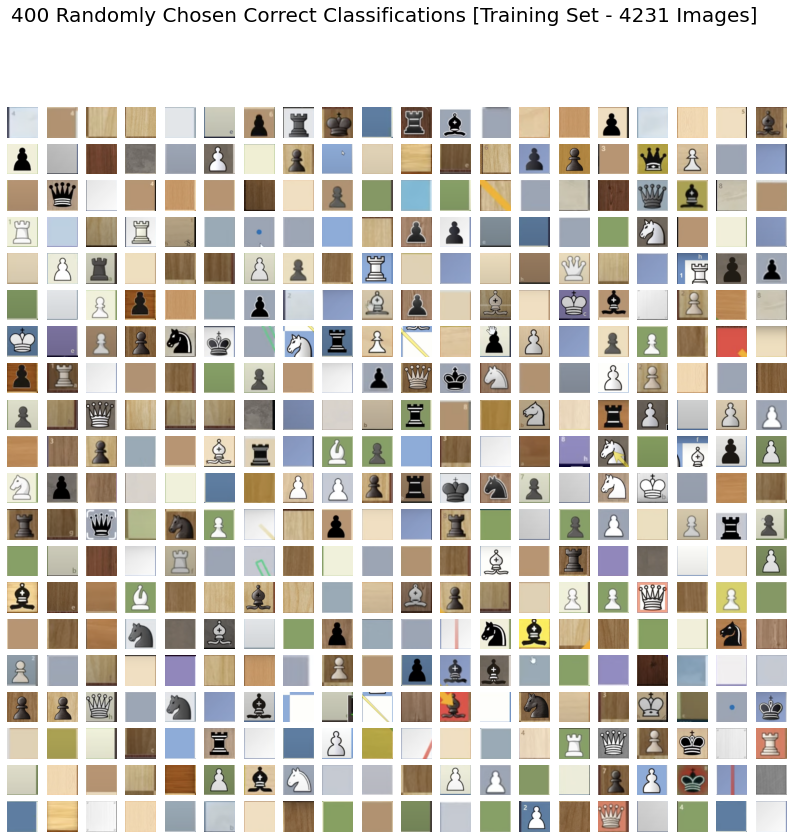

In [11]:
train_corr_data = []
corr_files = []
for _i, (_l, _p) in enumerate(zip(train_label_ind, train_pred_ind)):
    if _l == _p:
        train_corr_data.append(_i)

tot_corr = 400
train_corr_data = np.random.choice(train_corr_data, 400, replace=False)
        
col_ct = 20
for _i, _fi in enumerate(train_corr_data):
    plt.subplot(len(train_corr_data)//col_ct+1, col_ct, _i+1)
    plt.imshow(Image.open('/'.join([source_train, train_data_files[_fi]])))
    plt.gca().set_axis_off()
    #plt.gca().set_title('Label: {0}, Pred: {1}'.format(label_dict[train_label_ind[_fi]], label_dict[train_pred_ind[_fi]]))
plt.gcf().set_size_inches(14,14)
plt.suptitle('400 Randomly Chosen Correct Classifications [Training Set - {0} Images]'.format(len(train_data_files)), fontsize= 20) 
plt.show()

<li> For the correct classifications, most of the classifications seem to come from "clean-cut" squares while some seeping from the sides don't seem to make a difference. 
<li> The algorithm also seems pretty robust to the actual color of the chessboard square.

<h3>Validation Results</h3>

Let's use the model to recreate the results for the validation set and analyze them.

In [12]:
validation_model = Piece_Classification(model_dir, model_weight_fname)

source_valid = 'data/raw/squares/validation'
labels_csv_full_path = 'data/model/sq_labels.csv'
label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
fname_col = 'fname'
label_cols = ['PcColor-BWE', 'PcType-PRNBQKE']
square_size = 80   
image_size = [square_size, square_size]


(_, y_valid) = validation_model.make_X_y(source_valid, labels_csv_full_path, fname_col, label_cols, label_dict_csv_full_path,image_size)
y_valid_pred = validation_model.predict(source_valid, image_size)

All image Count:5696
Data Dir Count:1128
Final Count to Process:1128
Prediction Image Count:1128


2021-12-21 18:11:07.138772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [13]:
label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
label_dict = list(pd.read_csv(label_dict_csv_full_path, header=None).iloc[:,0])

valid_label_ind = y_valid.argmax(axis=1)
valid_pred_ind = y_valid_pred.argmax(axis=1)
valid_confusion = tf.math.confusion_matrix(y_valid.argmax(axis=1), y_valid_pred.argmax(axis=1))
valid_confusion_df = pd.DataFrame(data=valid_confusion.numpy().T, columns = label_dict, index = [_+'_pred' for _ in label_dict])
print('Confusion Matrix for the Validation Set - _pred stands for model prediction')
valid_confusion_df

Confusion Matrix for the Validation Set - _pred stands for model prediction


,EE,WP,WR,WN,WB,WQ,WK,BP,BR,BN,BB,BQ,BK
EE_pred,707,0,0,2,0,0,0,1,0,0,0,0,0
WP_pred,0,109,0,1,1,0,0,1,0,0,0,0,0
WR_pred,0,1,28,0,0,1,0,1,0,0,0,0,0
WN_pred,0,1,0,23,0,0,0,0,0,0,0,0,0
WB_pred,0,0,0,0,19,0,0,0,0,0,0,0,0
WQ_pred,0,0,0,0,0,11,0,0,0,0,0,0,0
WK_pred,0,0,0,0,0,0,13,0,0,0,0,0,1
BP_pred,0,0,0,0,0,0,0,103,1,0,0,0,0
BR_pred,0,0,0,0,0,0,0,0,26,0,0,0,1
BN_pred,0,1,0,0,0,0,0,0,0,22,0,0,0


<li>Recall errors seem to be for White pieces. In particular, recall error for White kNights is the highest.
<li>Now, let's see the images. 

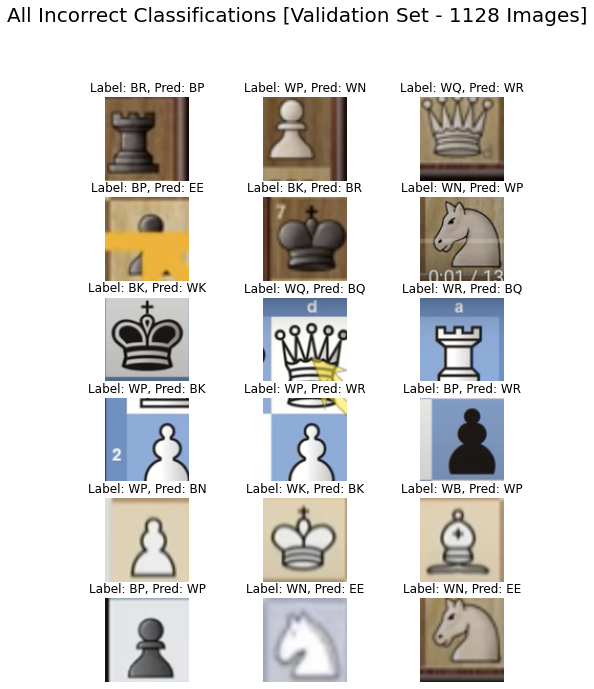

In [14]:
IMG_FORMATS = ['png', 'jpg', 'jpeg']
valid_data_files =  sorted([_ for _ in os.listdir(source_valid) if _.split('.')[-1] in IMG_FORMATS])

valid_err_data = []
err_files = []
for _i, (_l, _p) in enumerate(zip(valid_label_ind, valid_pred_ind)):
    if _l != _p:
        valid_err_data.append(_i)
        err_files.append(valid_data_files[_i])

col_ct = 3
for _i, _fi in enumerate(valid_err_data):
    plt.subplot(len(valid_err_data)//col_ct+1, col_ct, _i+1)
    plt.imshow(Image.open('/'.join([source_valid, valid_data_files[_fi]])))
    plt.gca().set_axis_off()
    plt.gca().set_title('Label: {0}, Pred: {1}'.format(label_dict[valid_label_ind[_fi]], label_dict[valid_pred_ind[_fi]]))
plt.gcf().set_size_inches(8,len(valid_err_data)*0.7)
plt.suptitle('All Incorrect Classifications [Validation Set - {0} Images]'.format(len(valid_data_files)), fontsize=20) 
plt.show()

<li> In addition to the above notes, anecdotally, proper square extraction also seems to play an important role for prediction, especially for the blue chess set.
<li> A larger dataset with more varied chess sets, or perhaps some augmentation, could correct the errors here but I will not attempt that at this stage. (What I have done to "remedy" this instead, in the end-to-end demonstration, was to train a model with all available data as training data and without any validation set. My thinking was that the training and validation percentages were already close at 100% and 98.4% respectively and if more data improved the output, I'd still be fairly confident that the model was not too overfit.)
<li> With the given data, another approach to a better validation loss could be via using a somewhat smaller kernel size or a higher number of filters in the first convolution layer or both.